https://chatgpt.com/share/67c54f0f-b030-800f-b1ac-a647f708a5a0

### Download Dataset

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
import os
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download dataset
dataset_path = "manjirivadujkar/e-commerce-retail-dataset"
output_path = "path/to/output"

# Ensure output path exists
os.makedirs(output_path, exist_ok=True)

# Download dataset
api.dataset_download_files(dataset_path, path=output_path, unzip=True)

print("Dataset downloaded to:", output_path)


'\nimport os\nfrom kaggle.api.kaggle_api_extended import KaggleApi\n\n# Initialize Kaggle API\napi = KaggleApi()\napi.authenticate()\n\n# Download dataset\ndataset_path = "manjirivadujkar/e-commerce-retail-dataset"\noutput_path = "path/to/output"\n\n# Ensure output path exists\nos.makedirs(output_path, exist_ok=True)\n\n# Download dataset\napi.dataset_download_files(dataset_path, path=output_path, unzip=True)\n\nprint("Dataset downloaded to:", output_path)\n'

### Import lib and read dataset

In [4]:
customer = pd.read_csv('/content/drive/MyDrive/dataset/Customer-Details.csv')
order = pd.read_csv('/content/drive/MyDrive/dataset/Order-Details.csv')
product = pd.read_csv('/content/drive/MyDrive/dataset/Product-Details.csv')

In [5]:
df1 = pd.DataFrame(customer)
df1

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment
0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular
1,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium
2,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular
3,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium
4,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,31.0,Male,Medium,Regular
302006,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,35.0,Female,Low,New
302007,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,41.0,Male,Low,Premium
302008,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,41.0,Male,Medium,New


In [6]:
df2 = pd.DataFrame(order)
df2

,Transaction_ID,Customer_ID,Date,Total_Purchases,Amount,Product_Id,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings
0,8691788.0,37249.0,2023-09-18,3.0,108.028757,1087,Excellent,Same-Day,Debit Card,Shipped,5.0
1,2174773.0,69749.0,2023-12-31,2.0,403.353907,1165,Excellent,Standard,Credit Card,Processing,4.0
2,6679610.0,30192.0,2023-04-26,3.0,354.477600,1271,Average,Same-Day,Credit Card,Processing,2.0
3,7232460.0,62101.0,2023-05-08,7.0,352.407717,1304,Excellent,Standard,PayPal,Processing,4.0
4,4983775.0,27901.0,2024-01-10,2.0,124.276524,1059,Bad,Standard,Cash,Shipped,1.0
...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,2024-01-20,5.0,194.792597,1145,Bad,Same-Day,Cash,Processing,1.0
302006,1197603.0,69772.0,2023-12-28,1.0,285.137301,1169,Excellent,Same-Day,Cash,Processing,5.0
302007,7743242.0,28449.0,2024-02-27,3.0,60.701761,1209,Average,Express,Cash,Shipped,2.0
302008,9301950.0,45477.0,2023-09-03,1.0,120.834784,1302,Good,Standard,Cash,Shipped,4.0


In [7]:
df3 = pd.DataFrame(product)
df3

,Product_Id,Product_Category,Product_Type,Products
0,1087,Clothing,Shorts,Cycling shorts
1,1165,Electronics,Tablet,Lenovo Tab
2,1271,Books,Children's,Sports equipment
3,1304,Home Decor,Tools,Utility knife
4,1059,Grocery,Chocolate,Chocolate cookies
...,...,...,...,...
302005,1145,Books,Fiction,Historical fiction
302006,1169,Electronics,Laptop,LG Gram
302007,1209,Clothing,Jacket,Parka
302008,1302,Home Decor,Furniture,TV stand


In [8]:
df = pd.concat([df1, df2, df3], axis=1)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       301702 non-null  float64
 1   Name              301628 non-null  object 
 2   Email             301663 non-null  object 
 3   Phone             301648 non-null  float64
 4   Address           301695 non-null  object 
 5   City              301762 non-null  object 
 6   State             301729 non-null  object 
 7   Zipcode           301670 non-null  float64
 8   Country           301739 non-null  object 
 9   Age               301837 non-null  float64
 10  Gender            301693 non-null  object 
 11  Income            301720 non-null  object 
 12  Customer_Segment  301795 non-null  object 
 13  Transaction_ID    301677 non-null  float64
 14  Customer_ID       301702 non-null  float64
 15  Date              301651 non-null  object 
 16  Total_Purchases   30

In [10]:
#check NaN data
print(f'Info data null\n{df.isna().sum()}')

Info data null
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Transaction_ID      333
Customer_ID         308
Date                359
Total_Purchases     361
Amount              357
Product_Id            0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
Product_Id            0
Product_Category    283
Product_Type          0
Products              0
dtype: int64


In [11]:
#clear NaN data
df = df.dropna()

In [12]:
print(f'Info data duplicate\n{df["Customer_ID"].duplicated().sum()}')

Info data duplicate
208941


In [13]:
print(f'Deskripsi data\n{df.describe(include="all")}')
df = df.loc[:, ~df.columns.duplicated()]



Deskripsi data
          Customer_ID           Name                Email         Phone  \
count   295479.000000         295479               295479  2.954790e+05   
unique            NaN         157187                52601           NaN   
top               NaN  Michael Smith  Michael59@gmail.com           NaN   
freq              NaN            142                   92           NaN   
mean     55010.045320            NaN                  NaN  5.500866e+09   
std      26007.527039            NaN                  NaN  2.596226e+09   
min      10000.000000            NaN                  NaN  1.000049e+09   
25%      32468.000000            NaN                  NaN  3.253760e+09   
50%      55022.000000            NaN                  NaN  5.505359e+09   
75%      77510.000000            NaN                  NaN  7.749559e+09   
max      99999.000000            NaN                  NaN  9.999996e+09   

                           Address     City    State        Zipcode Country  \
count

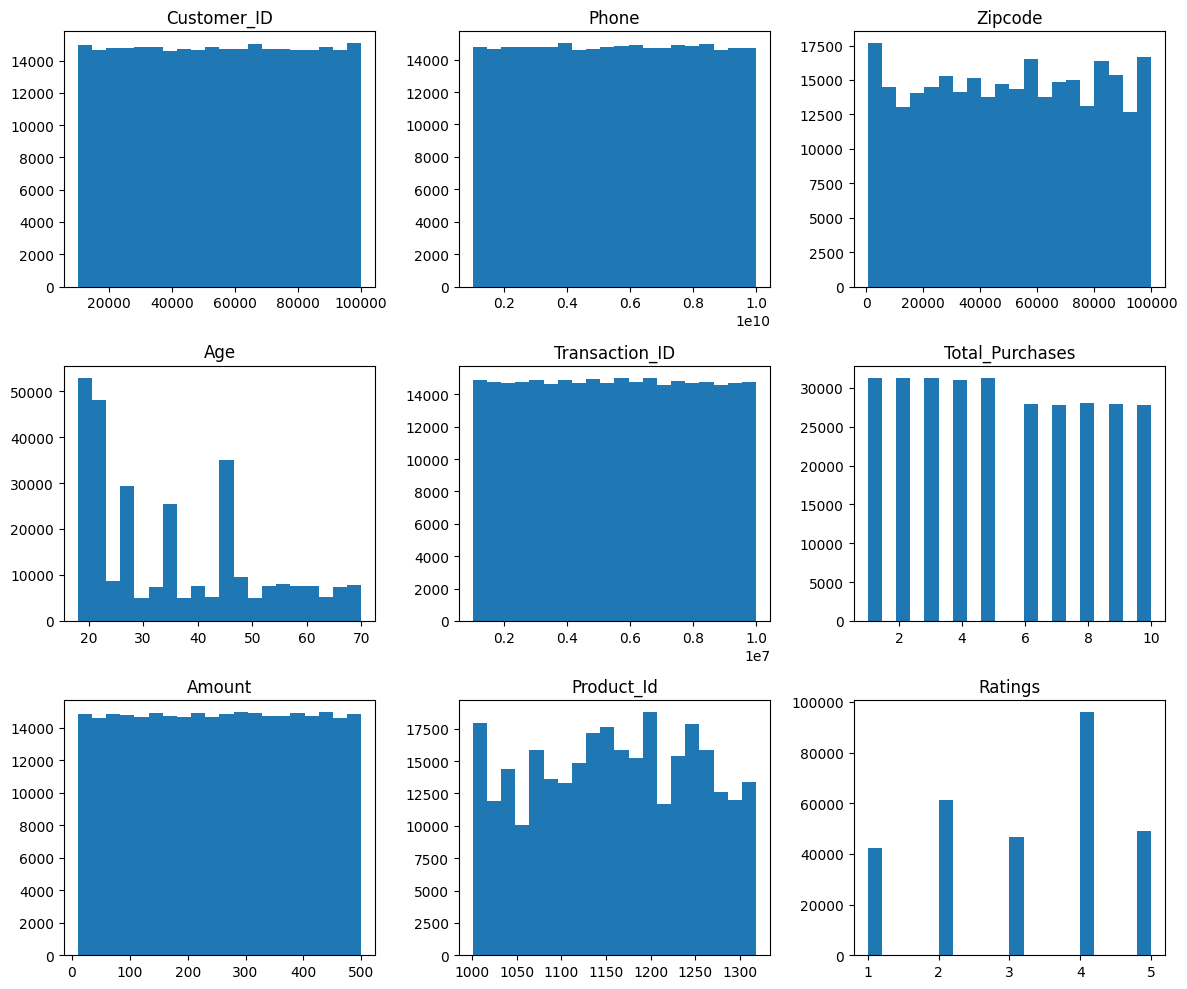

In [14]:
# Visualization Data Numeric
numeric_columns = df.select_dtypes(include='number')

numeric_columns.hist(figsize=(12, 10), bins=20, grid=False)
plt.tight_layout()
plt.show()


In [15]:
df.columns

Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment',
       'Transaction_ID', 'Date', 'Total_Purchases', 'Amount', 'Product_Id',
       'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status',
       'Ratings', 'Product_Category', 'Product_Type', 'Products'],
      dtype='object')

In [16]:
#drop unused column data
df1 = df.drop(['Customer_ID','Email','Zipcode','Name','Address','Phone','Transaction_ID','Feedback','Product_Id','Order_Status','Product_Id'], axis=1)

In [17]:
df.columns

Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment',
       'Transaction_ID', 'Date', 'Total_Purchases', 'Amount', 'Product_Id',
       'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status',
       'Ratings', 'Product_Category', 'Product_Type', 'Products'],
      dtype='object')

In [18]:
df

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Amount,Product_Id,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,Product_Category,Product_Type,Products
0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,...,108.028757,1087,Excellent,Same-Day,Debit Card,Shipped,5.0,Clothing,Shorts,Cycling shorts
1,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,...,403.353907,1165,Excellent,Standard,Credit Card,Processing,4.0,Electronics,Tablet,Lenovo Tab
2,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,...,354.477600,1271,Average,Same-Day,Credit Card,Processing,2.0,Books,Children's,Sports equipment
3,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,...,352.407717,1304,Excellent,Standard,PayPal,Processing,4.0,Home Decor,Tools,Utility knife
4,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,...,124.276524,1059,Bad,Standard,Cash,Shipped,1.0,Grocery,Chocolate,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,31.0,...,194.792597,1145,Bad,Same-Day,Cash,Processing,1.0,Books,Fiction,Historical fiction
302006,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,35.0,...,285.137301,1169,Excellent,Same-Day,Cash,Processing,5.0,Electronics,Laptop,LG Gram
302007,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,41.0,...,60.701761,1209,Average,Express,Cash,Shipped,2.0,Clothing,Jacket,Parka
302008,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,41.0,...,120.834784,1302,Good,Standard,Cash,Shipped,4.0,Home Decor,Furniture,TV stand


In [19]:

data = df1

# Connect to database
conn = mysql.connector.connect(
    host="hostname",
    user="username",
    password="password",
    database="retail_sales"
)

cursor = conn.cursor()

# insert data to table
def insert_data(table_name, columns, df):
    placeholders = ", ".join(["%s"] * len(columns))
    columns_str = ", ".join(columns)
    sql = f"INSERT INTO {table_name} ({columns_str}) VALUES ({placeholders})"
    cursor.executemany(sql, df)
    conn.commit()
    print(f"Data berhasil disisipkan ke {table_name}!")

# convert list to tuple
data_tuples = [tuple(x) for x in df.to_numpy()]

# insert data to table
insert_data(
    "retail_data",
    df.columns.tolist(),
    data_tuples
)

# close connection
cursor.close()
conn.close()

'\ndata = df\n\n# Connect to database\nconn = mysql.connector.connect(\n    host="hostname",\n    user="username",\n    password="password",\n    database="retail_sales"\n)\n\ncursor = conn.cursor()\n\n# insert data to table\ndef insert_data(table_name, columns, df):\n    placeholders = ", ".join(["%s"] * len(columns))\n    columns_str = ", ".join(columns)\n    sql = f"INSERT INTO {table_name} ({columns_str}) VALUES ({placeholders})"\n    cursor.executemany(sql, df)\n    conn.commit()\n    print(f"Data berhasil disisipkan ke {table_name}!")\n\n# convert list to tuple\ndata_tuples = [tuple(x) for x in df.to_numpy()]\n\n# insert data to table\ninsert_data(\n    "retail_data",\n    df.columns.tolist(),\n    data_tuples\n)\n\n# close connection\ncursor.close()\nconn.close()\n'

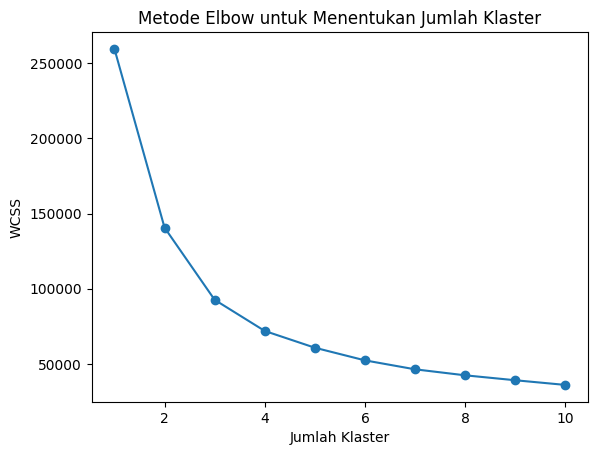

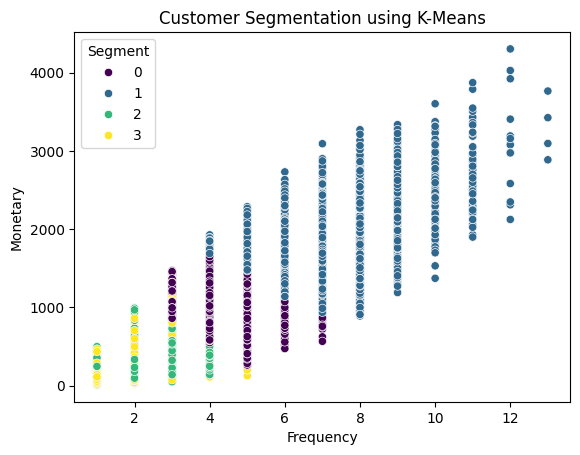

<ipython-input-20-bf30d0b2a29b>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_ID', y='CLV', data=df_top_clv, palette='coolwarm')


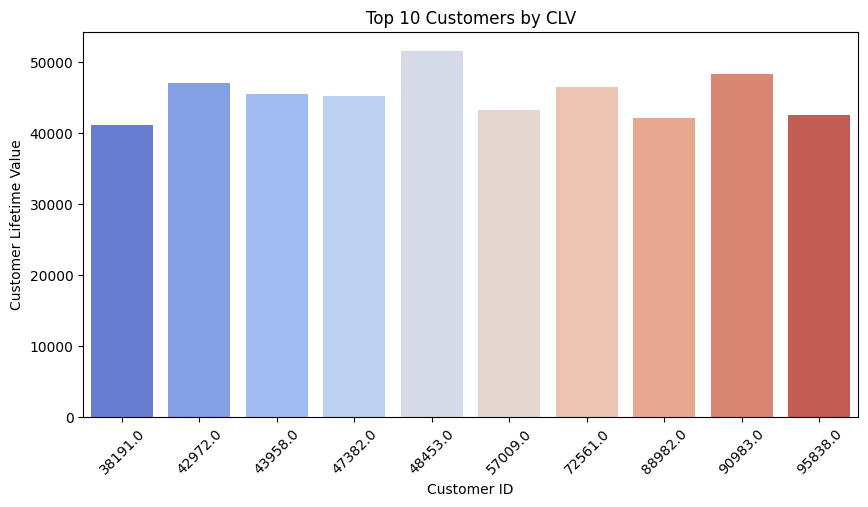

In [20]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# ================== 1. RFM ANALYSIS ==================
# Recency (days since last purchase)
# Ensure there are no duplicate column names
df = df.loc[:, ~df.columns.duplicated()]

# Calculate the latest date in the 'Date' column
latest_date = df['Date'].max() # Define latest_date here

# Now, try the groupby operation again
df_rfm = df.groupby('Customer_ID').agg(
    Recency=('Date', lambda x: (latest_date - x.max()).days),
    Frequency=('Transaction_ID', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

# Normalizing data
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])

# ================== 2. CLUSTERING (K-MEANS) ==================
# Menentukan jumlah klaster optimal dengan metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.show()

# Menggunakan K-Means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=4, random_state=42)
df_rfm['Segment'] = kmeans.fit_predict(df_rfm_scaled)

# Visualisasi Klaster
sns.scatterplot(x=df_rfm['Frequency'], y=df_rfm['Monetary'], hue=df_rfm['Segment'], palette='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

# ================== 3. CUSTOMER LIFETIME VALUE (CLV) ==================
df_clv = df.groupby('Customer_ID').agg(
    Total_Revenue=('Amount', 'sum'),
    Purchase_Frequency=('Transaction_ID', 'count'),
    Avg_Order_Value=('Amount', 'mean')
).reset_index()

# Estimasi CLV (Customer Lifetime Value)
df_clv['CLV'] = df_clv['Avg_Order_Value'] * df_clv['Purchase_Frequency'] * 12  # CLV untuk 1 tahun

# Visualisasi 10 pelanggan dengan CLV tertinggi
df_top_clv = df_clv[['Customer_ID', 'CLV']].sort_values(by='CLV', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Customer_ID', y='CLV', data=df_top_clv, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Customers by CLV')
plt.xlabel('Customer ID')
plt.ylabel('Customer Lifetime Value')
plt.show()

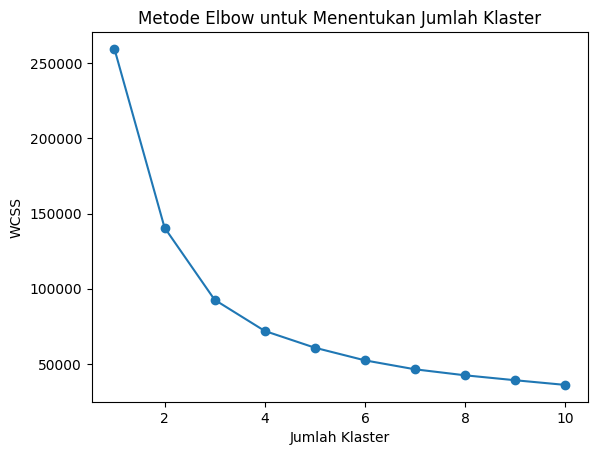

            Recency  Frequency     Monetary
Segment                                    
0         41.997089   4.153483  1059.490560
1        245.198366   1.557724   368.916818
2         63.266308   2.152309   475.487197
3         49.577709   6.359944  1757.909389
4        156.652693   3.436429   912.815940


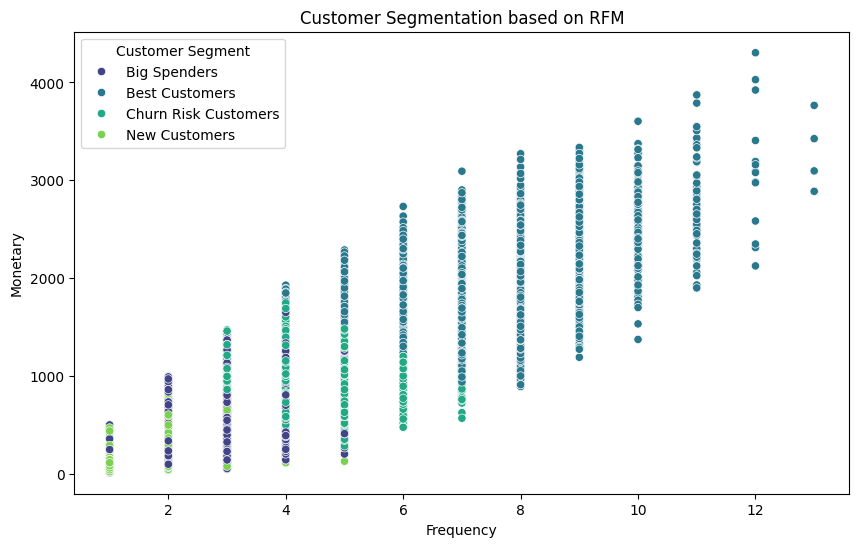

   Customer_ID  Recency  Frequency     Monetary      Customer_Segment
0      10000.0      102          4   940.297743          Big Spenders
1      10001.0      104          5  1517.921543        Best Customers
2      10002.0       94          5  1117.164676  Churn Risk Customers
3      10003.0      227          2   266.301835         New Customers
4      10004.0       30          2   460.702696          Big Spenders
5      10005.0      245          1   439.021139         New Customers
6      10006.0       15          4  1022.336464  Churn Risk Customers
7      10007.0       33          5  1090.912878  Churn Risk Customers
8      10008.0        8          5  1667.611565        Best Customers
9      10009.0       57          3   338.720709          Big Spenders


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df = df.loc[:, ~df.columns.duplicated()]

# calculate latest transaction date
latest_date = df['Date'].max()

# ================== 1. RFM ANALYSIS ==================
df_rfm = df.groupby('Customer_ID').agg(
    Recency=('Date', lambda x: (latest_date - x.max()).days),
    Frequency=('Transaction_ID', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

# Normalizing data
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])

# ================== 2. CLUSTERING (K-MEANS) ==================
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_rfm['Segment'] = kmeans.fit_predict(df_rfm_scaled)

# ================== 3. CUSTOMER SEGEMENTATION ==================

segment_map = df_rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()
print(segment_map)

def label_segment(row):
    if row['Segment'] == segment_map.sort_values(['Frequency', 'Monetary'], ascending=[False, False]).index[0]:
        return 'Best Customers'  # R high, F high, M high
    elif row['Segment'] == segment_map.sort_values(['Frequency', 'Monetary'], ascending=[False, True]).index[0]:
        return 'Loyal Customers'  # F high, M medium-high
    elif row['Segment'] == segment_map.sort_values(['Recency'], ascending=False).index[0]:
        return 'New Customers'  # R high, F low, M medium-high
    elif row['Segment'] == segment_map.sort_values(['Recency', 'Frequency', 'Monetary'], ascending=[True, True, True]).index[0]:
        return 'Churn Risk Customers'  # R low, F low, M low
    else:
        return 'Big Spenders'  # M high, F low-medium

df_rfm['Customer_Segment'] = df_rfm.apply(label_segment, axis=1)

# ================== 4. VISUALIZATION ==================
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_rfm['Frequency'], y=df_rfm['Monetary'], hue=df_rfm['Customer_Segment'], palette='viridis')
plt.title('Customer Segmentation based on RFM')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Customer Segment')
plt.show()

print(df_rfm[['Customer_ID', 'Recency', 'Frequency', 'Monetary', 'Customer_Segment']].head(10))


In [23]:
# SHOW 10 CUSTOMER BY CLV
df_customers = df[['Customer_ID', 'Name', 'Email', 'Phone', 'City', 'State', 'Zipcode', 'Country']].drop_duplicates(subset=['Customer_ID'])
df_clv_details = df_clv.merge(df_customers, on='Customer_ID', how='inner')
df_clv_details['CLV'] = pd.to_numeric(df_clv_details['CLV'], errors='coerce')
df_top_clv_details = df_clv_details.sort_values(by='CLV', ascending=False).head(10)
df_top_clv_details


,Customer_ID,Total_Revenue,Purchase_Frequency,Avg_Order_Value,CLV,Name,Email,Phone,City,State,Zipcode,Country
37003,48453.0,4303.834425,12,358.652869,51646.013099,Pamela Brennan,Sharon18@gmail.com,8.002659e+09,Portsmouth,England,49475.0,UK
77846,90983.0,4028.377746,12,335.698146,48340.532953,Angela Pitts,Bryan30@gmail.com,3.648646e+09,Portsmouth,England,53806.0,UK
31717,42972.0,3922.555408,12,326.879617,47070.664891,Kim Harvey,Elizabeth3@gmail.com,2.626317e+09,Portsmouth,England,89476.0,UK
60137,72561.0,3872.780956,11,352.070996,46473.371470,Eric Lewis,Kristina59@gmail.com,8.907639e+09,Bremen,Berlin,98714.0,Germany
32675,43958.0,3788.989525,11,344.453593,45467.874302,Debra Rowe,Jay24@gmail.com,5.921540e+09,Oklahoma City,New York,12343.0,USA
35964,47382.0,3765.576141,13,289.659703,45186.913686,Tanya Bowman,Tracey44@gmail.com,9.403060e+09,Portsmouth,England,67011.0,UK
45192,57009.0,3603.118270,10,360.311827,43237.419234,Lindsey Howard,Kevin53@gmail.com,3.204004e+09,Portsmouth,England,85197.0,UK
82504,95838.0,3547.839117,11,322.530829,42574.069400,Ashley Smith,Jacob33@gmail.com,6.801647e+09,Portsmouth,England,52294.0,UK
75910,88982.0,3507.487249,11,318.862477,42089.846986,Monica Rodriguez,Darin69@gmail.com,7.172522e+09,Fort Worth,New Mexico,74544.0,USA
27114,38191.0,3432.030154,11,312.002741,41184.361851,Paul Mueller,Mario40@gmail.com,6.659985e+09,Portsmouth,England,68031.0,UK


In [24]:
df_clv_sorted = df_clv.sort_values(by='CLV', ascending=True)

# (Low Spender)
low_spenders = df_clv_sorted.head(10)

# (High Spender)
high_spenders = df_clv_sorted.tail(10)

# (Medium Spender)
medium_spenders = df_clv_sorted.iloc[len(df_clv_sorted)//2 - 5 : len(df_clv_sorted)//2 + 5]

print("Low Spenders:\n", low_spenders)
print("\nMedium Spenders:\n", medium_spenders)
print("\nHigh Spenders:\n", high_spenders)


Low Spenders:
        Customer_ID  Total_Revenue  Purchase_Frequency  Avg_Order_Value  \
72376      85302.0      10.006931                   1        10.006931   
85205      98618.0      10.011603                   1        10.011603   
62128      74624.0      10.053295                   1        10.053295   
72828      85767.0      10.122882                   1        10.122882   
2757       12877.0      10.221281                   1        10.221281   
27304      38385.0      10.304530                   1        10.304530   
71615      84516.0      10.514500                   1        10.514500   
9418       19812.0      10.534465                   1        10.534465   
1775       11852.0      10.552754                   1        10.552754   
48431      60359.0      10.599239                   1        10.599239   

              CLV  
72376  120.083170  
85205  120.139239  
62128  120.639535  
72828  121.474584  
2757   122.655375  
27304  123.654360  
71615  126.173997  
9418   126

<ipython-input-25-b6e5fdc56f24>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_ID', y='CLV', data=low_spenders, palette='Blues', ax=axes[0])
<ipython-input-25-b6e5fdc56f24>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_ID', y='CLV', data=medium_spenders, palette='Greens', ax=axes[1])
<ipython-input-25-b6e5fdc56f24>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_ID', y='CLV', data=high_spenders, palette='Reds', ax=axes[2])


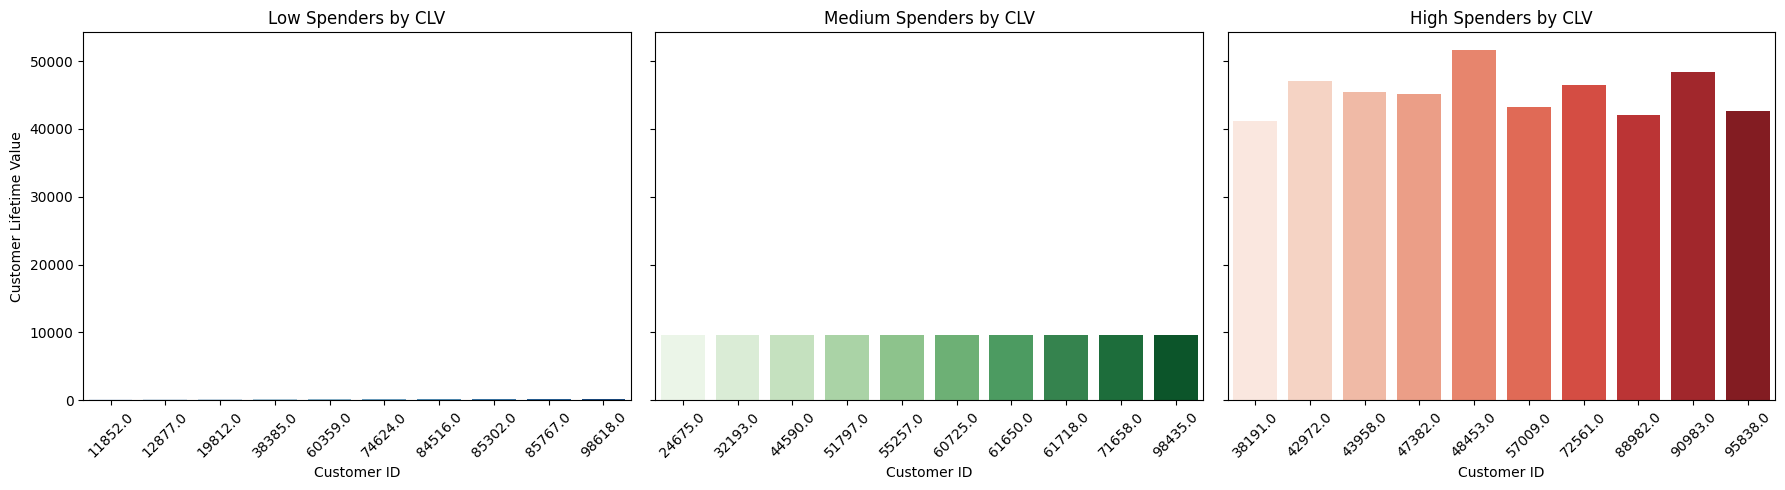

In [25]:

# low_spenders, medium_spenders, high_spenders
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot Low Spenders
sns.barplot(x='Customer_ID', y='CLV', data=low_spenders, palette='Blues', ax=axes[0])
axes[0].set_title('Low Spenders by CLV')
axes[0].set_xlabel('Customer ID')
axes[0].set_ylabel('Customer Lifetime Value')
axes[0].tick_params(axis='x', rotation=45)

# Plot Medium Spenders
sns.barplot(x='Customer_ID', y='CLV', data=medium_spenders, palette='Greens', ax=axes[1])
axes[1].set_title('Medium Spenders by CLV')
axes[1].set_xlabel('Customer ID')
axes[1].tick_params(axis='x', rotation=45)

# Plot High Spenders
sns.barplot(x='Customer_ID', y='CLV', data=high_spenders, palette='Reds', ax=axes[2])
axes[2].set_title('High Spenders by CLV')
axes[2].set_xlabel('Customer ID')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [26]:
# merge data rfm to data df
df_merged = df.merge(df_rfm, on='Customer_ID', how='left')
dff = df_merged.merge(df_clv, on='Customer_ID', how='left')
dff.columns


Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment_x',
       'Transaction_ID', 'Date', 'Total_Purchases', 'Amount', 'Product_Id',
       'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status',
       'Ratings', 'Product_Category', 'Product_Type', 'Products', 'Recency',
       'Frequency', 'Monetary', 'Segment', 'Customer_Segment_y',
       'Total_Revenue', 'Purchase_Frequency', 'Avg_Order_Value', 'CLV'],
      dtype='object')

<ipython-input-27-86fe4cc9a055>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dff['Churn'], palette='viridis')


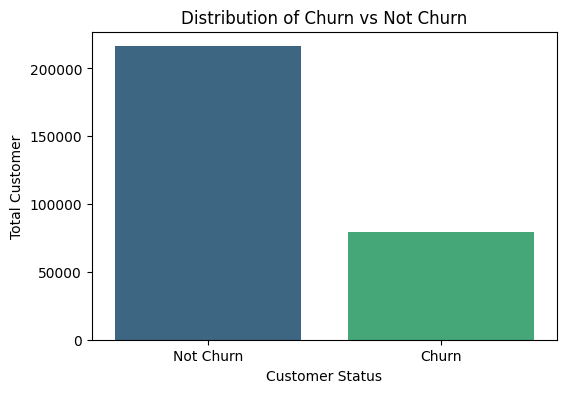

<ipython-input-27-86fe4cc9a055>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dff, palette='viridis')
<ipython-input-27-86fe4cc9a055>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dff, palette='viridis')
<ipython-input-27-86fe4cc9a055>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=dff, palette='viridis')
<ipython-input-27-86fe4cc9a055>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

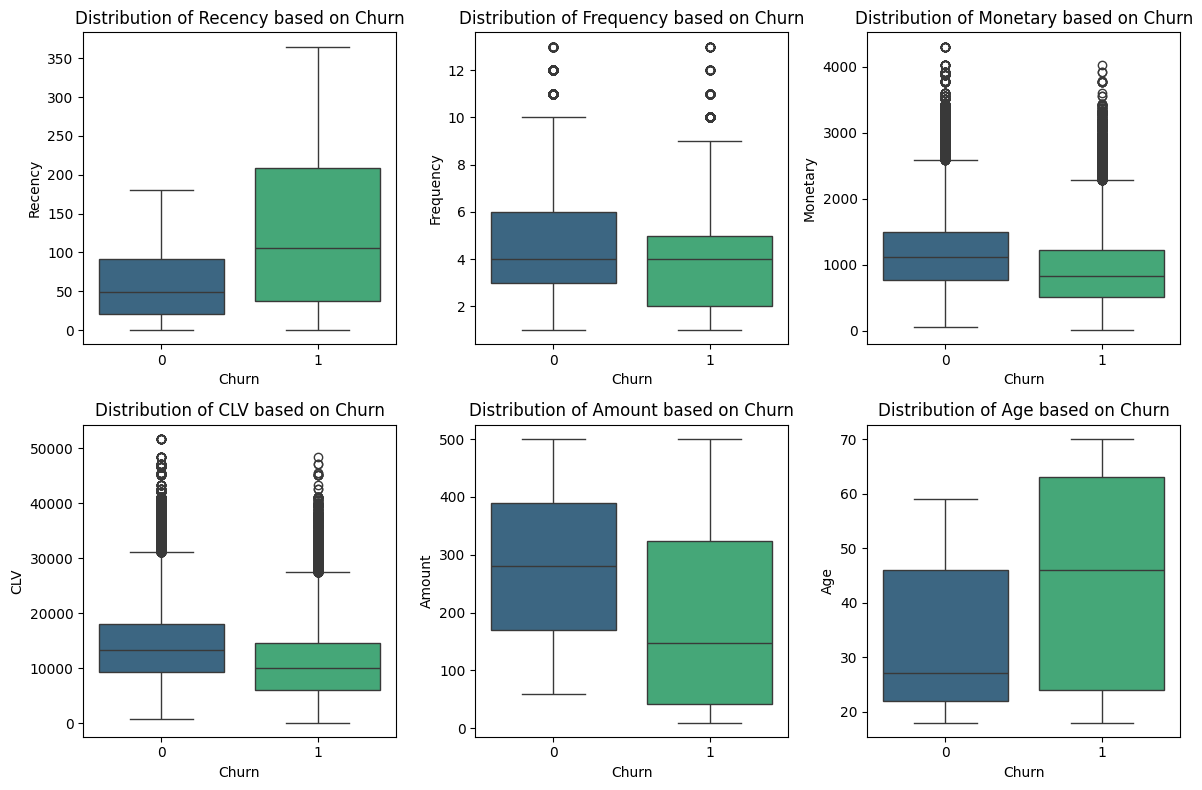

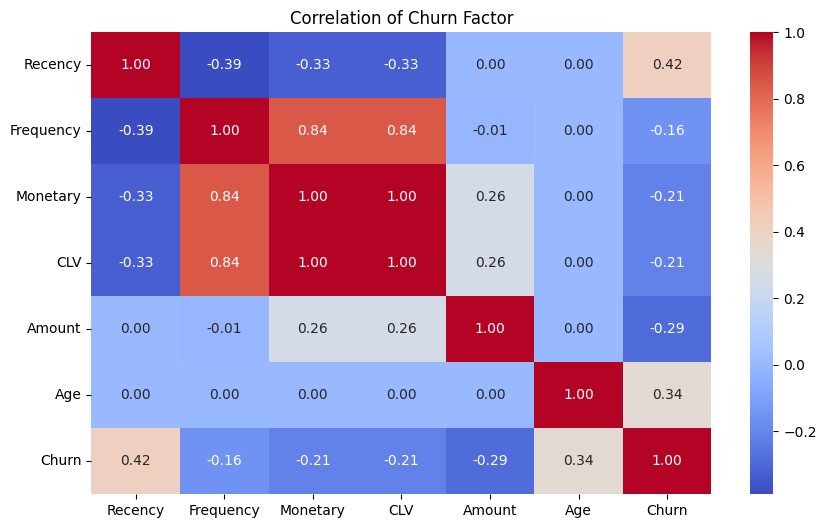

In [27]:
# Threshold churn
churn_threshold_days = 180  # 180 days
amount_threshold = dff['Amount'].quantile(0.10)  # Custimer with low amount
age_threshold = dff['Age'].quantile(0.90)  # Customer with old age

# Determine churn with 3 parameter
dff['Churn'] = (
    (dff['Recency'] > churn_threshold_days) |
    (dff['Amount'] < amount_threshold) |
    (dff['Age'] > age_threshold)
).astype(int)

# ================== 1. Distribution of Churn ==================
plt.figure(figsize=(6, 4))
sns.countplot(x=dff['Churn'], palette='viridis')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.title('Distribution of Churn vs Not Churn')
plt.xlabel('Customer Status')
plt.ylabel('Total Customer')
plt.show()

# ================== 2. Analysis RFM and Age ==================
metrics = ['Recency', 'Frequency', 'Monetary', 'CLV', 'Amount', 'Age']
plt.figure(figsize=(12, 8))
for i, col in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=dff, palette='viridis')
    plt.title(f'Distribution of {col} based on Churn')
plt.tight_layout()
plt.show()

# ================== 3. Correlation of churn with other parameter ==================
plt.figure(figsize=(10, 6))
sns.heatmap(dff[['Recency', 'Frequency', 'Monetary', 'CLV', 'Amount', 'Age', 'Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Churn Factor")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
7387/7387 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9136 - loss: 0.1950 - val_accuracy: 0.9944 - val_loss: 0.0175
Epoch 2/5
7387/7387 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9848 - loss: 0.0383 - val_accuracy: 0.9905 - val_loss: 0.0219
Epoch 3/5
7387/7387 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9878 - loss: 0.0304 - val_accuracy: 0.9904 - val_loss: 0.0243
Epoch 4/5
7387/7387 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9889 - loss: 0.0283 - val_accuracy: 0.9925 - val_loss: 0.0168
Epoch 5/5
7387/7387 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9892 - loss: 0.0269 - val_accuracy: 0.9928 - val_loss: 0.0174
1847/1847 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Akurasi Model: 0.9927744686611615
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     43304
           1       0.99      0.99      0.99     15792

    accuracy                           0.99     59096
   macro avg       0.99      0.99      0.99     59096
w

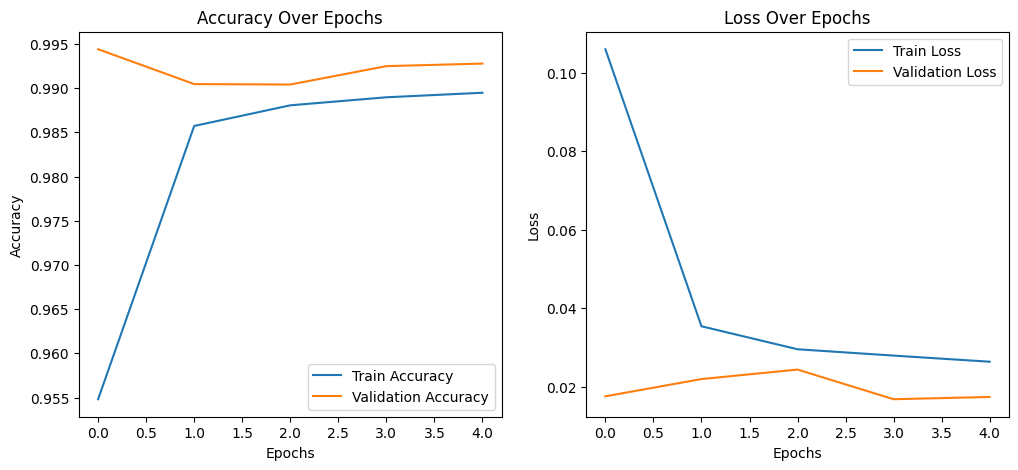

In [28]:
# ================== 1. Data Preprocessing ==================
features = ['Recency', 'Frequency', 'Monetary', 'Total_Revenue', 'Purchase_Frequency', 'Avg_Order_Value', 'CLV', 'Amount', 'Age']
X = dff[features]
y = dff['Churn']

# Normalization fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ================== 2. Building ANN Model ==================
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ================== 3. Evaluation of Model ==================
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ================== 4. Visualization ==================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


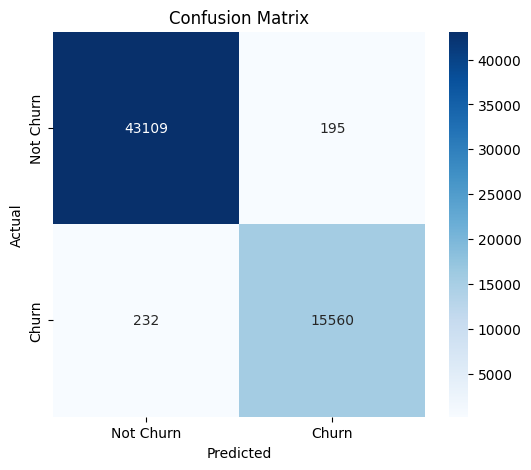

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


1847/1847 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


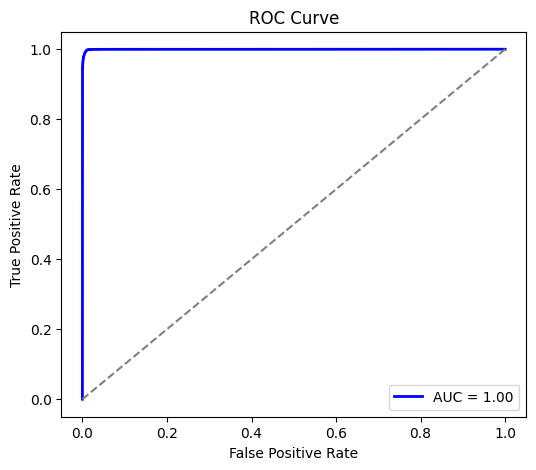

In [30]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


ExactExplainer explainer: 59097it [46:02, 21.39it/s]


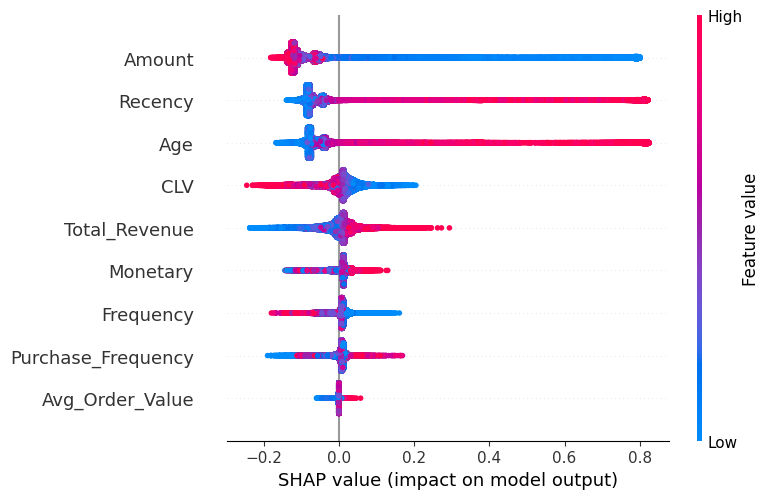

In [31]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features)


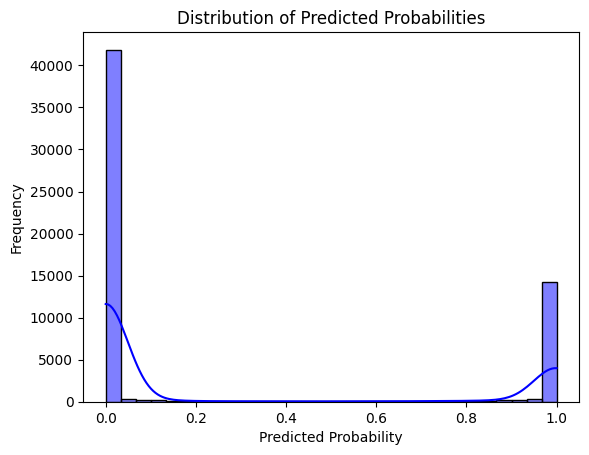

In [32]:
sns.histplot(y_pred_proba, bins=30, kde=True, color='blue')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()
